AI Competition for the Prediction of Water Level in Hangang River by the Flood Safety Management of Paldang Dam
---
팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회

> tensorflow GPU 접근 테스트

In [1]:
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
%%time
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tf.enable_v2_behavior()

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

batch_size = 128

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu'),
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#   tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    ds_train,
    epochs=12,
    validation_data=ds_test,
)

Metal device set to: Apple M2
Cause: Unable to locate the source code of <function normalize_img at 0x288eb7d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-08-18 21:34:06.802938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-18 21:34:06.803032: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Cause: Unable to locate the source code of <function normalize_img at 0x288eb7d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autogr

Cause: Unable to locate the source code of <function normalize_img at 0x288eb7d30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-08-18 21:34:06.874077: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-18 21:34:06.874099: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-18 21:34:06.876075: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-08-18 21:34:06.881259: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-18 21:34:07.000272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 21:34:07.010576: I tensorflow/core/grappler/optimizers/custom_graph

Train on 469 steps, validate on 79 steps
Epoch 1/12


2022-08-18 21:34:07.162885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 21:34:07.174565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 21:34:07.191308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 21:34:07.205588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 21:34:07.232743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 21:34:07.243621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - batch: 233.5000 - size: 1.0000 - loss: 0.1596 - accuracy: 0.9517

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-08-18 21:34:14.369394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.1594 - accuracy: 0.9517 - val_loss: 0.0506 - val_accuracy: 0.9838
Epoch 2/12
469/469 [==============================] - 7s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0433 - accuracy: 0.9872 - val_loss: 0.0379 - val_accuracy: 0.9873
Epoch 3/12
469/469 [==============================] - 7s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 4/12
469/469 [==============================] - 7s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0291 - val_accuracy: 0.9901
Epoch 5/12
469/469 [==============================] - 7s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0370 - val_accuracy: 0.9880
Epoch 6/12
469/469 [==============================] - 7s 14ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0103 - accuracy: 0.99

> Good

# data

## Water Data

- ymdhm : 년월일시분
- swl : 팔당댐 현재수위 (단위: El.m)
- inf : 팔당댐 유입량 (단위: m^3/s)
- sfw : 팔당댐 저수량 (단위: 만m^3)
- ecpc : 팔당댐 공용량 (단위: 백만m^3)
- tototf : 총 방류량 (단위: m^3/s)
- tide_level : 강화대교 조위 (단위: cm)
- wl_1018662 : 청담대교 수위 (단위: cm)
- fw_1018662 : 청담대교 유량 (단위: m^3/s)
- wl_1018680 : 잠수교 수위 (단위: cm)
- fw_1018680 : 잠수교 유량 (단위: m^3/s)
- wl_1018683 : 한강대교 수위 (단위: cm)
- fw_1018683 : 한강대교 유량 (단위: m^3/s)
- wl_1019630 : 행주대교 수위 (단위: cm)
- fw_1019630 : 행주대교 유량 (단위: m^3/s)

## RainFall Data

- YMDHM : 년월일시분
- rf_10184100 : 대곡교 강수량
- rf_10184110 : 진관교 강수량
- rf_10184140 : 송정동 강수량
---

## 기타 용어 정리

- 최고 수위 : 일정한 기간을 통하여 나타난 최고의 수위
- 최저 수위 : 일정한 기간을 통하여 나타난 최저의 수위
- 평수위 : 1년을 통하여 185일은 이보다 높은 수위
- 저수위 : 1년을 통하여 275일은 이보다 높은 수위
- 갈수위 : 1년을 통하여 355일은 이보다 높은 수위
- 일평균 수위 : 1일을 통하여 1시부터 24시까지 매시 수위의 합을 24로 나눈 수위
- 연평균 수위 : 1년을 통하여 일평균 수위의 합을 당해 연도의 일수로 나눈 수위
- 감조하천 : 조석의 영향으로 하천의 하류부에서 수위가 변하는 하천


## 주요 링크 모음

한강 홍수 통제소
- http://www.hrfco.go.kr/sumun/rainfallList.do#

한국 수자원 공사
- https://www.kwater.or.kr/main.do?s_mid=1

정보공개
- https://www.open.go.kr/com/main/mainView.do?mainBgGubun=search

## import

In [4]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화
import seaborn as sns

# 추가 시각화
from colorama import Fore

# MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Supress warnings 
import warnings 
warnings.filterwarnings('ignore')

# 재현성
np.random.seed(7)

# 모델들, 성능 평가
# (저는 일반적으로 정형데이터로 머신러닝 분석할 때는 이 2개 모델은 그냥 돌려봅니다. 특히 RF가 테스트하기 좋습니다.)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMClassifier
from lightgbm.sklearn import LGBMRegressor

# 상관관계 분석, VIF : 다중공선성 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor

# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna
import os

# MICE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [5]:
# flag setting
data_reducing = False ## memory reducing technique
feature_reducing = False ## feature extraction (curse of dimensionality)

## data load

In [6]:
df_water = pd.DataFrame()
for files in os.listdir('competition_data/water_data/'):
    df_con = pd.read_csv(f'competition_data/water_data/{files}', parse_dates=['ymdhm'])
    df_water = pd.concat([df_water,df_con], ignore_index=True)
# for files in os.listdir('competition_data/rf_data/'):
#     pass
df_water = df_water.sort_values(by = df_water.columns[0]).reset_index(drop = True)
df_water.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
1,2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2,2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
3,2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
4,2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29


In [7]:
df_rf = pd.DataFrame()
for files in os.listdir('competition_data/rf_data/'):
    df_con = pd.read_csv(f'competition_data/rf_data/{files}', parse_dates=['ymdhm'])
    df_rf = pd.concat([df_rf,df_con], ignore_index=True)
# for files in os.listdir('competition_data/rf_data/'):
#     pass
df_rf = df_rf.sort_values(by = df_rf.columns[0]).reset_index(drop = True)
df_rf.drop(columns='ymdhm').head()

,rf_10184100,rf_10184110,rf_10184140
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [8]:
df = pd.concat([df_water,df_rf.drop(columns='ymdhm')], axis = 1)
df.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        276336 non-null  datetime64[ns]
 1   swl          275593 non-null  float64       
 2   inf          275593 non-null  float64       
 3   sfw          275593 non-null  float64       
 4   ecpc         275593 non-null  float64       
 5   tototf       275593 non-null  float64       
 6   tide_level   271409 non-null  float64       
 7   wl_1018662   276277 non-null  float64       
 8   fw_1018662   259956 non-null  float64       
 9   wl_1018680   276277 non-null  float64       
 10  fw_1018680   79487 non-null   float64       
 11  wl_1018683   276277 non-null  float64       
 12  fw_1018683   275057 non-null  float64       
 13  wl_1019630   276277 non-null  float64       
 14  fw_1019630   276277 non-null  float64       
 15  rf_10184100  276336 non-null  floa

### train data
> 2012-05-01 00:00:00 ~ 2022-05-31 23:50:00

In [10]:
train = df[df.ymdhm < '2022-06-01 00:00:00']

In [11]:
train.head(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0


In [12]:
train.tail(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
269421,2022-05-31 23:30:00,25.18,141.01,217.99,26.01,141.01,196.0,278.7,269.40,277.2,NaN,277.0,425.89,272.3,505.03,0.0,0.0,0.0
269422,2022-05-31 23:40:00,25.19,755.75,218.36,25.64,140.75,184.0,277.7,264.07,276.2,NaN,276.0,198.19,271.3,493.58,0.0,0.0,0.0
269423,2022-05-31 23:50:00,25.19,140.56,218.36,25.64,140.56,173.0,278.7,269.40,276.2,NaN,275.0,70.09,270.3,482.26,0.0,0.0,0.0


### test data 
> 2022-06-01 00:00:00 ~ 2022-07-18 23:50:00

In [13]:
test = df[df.ymdhm >= '2022-06-01 00:00:00']

In [14]:
test.head(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
269424,2022-06-01 00:00:00,25.19,140.60,218.36,25.64,140.60,162.0,0.0,269.40,0.0,NaN,0.0,8.23,0.0,471.08,0.0,0.0,0.0
269425,2022-06-01 00:10:00,25.19,140.78,218.36,25.64,140.78,151.0,0.0,280.22,0.0,NaN,0.0,28.82,0.0,449.12,0.0,0.0,0.0
269426,2022-06-01 00:20:00,25.20,755.90,218.73,25.27,140.90,141.0,0.0,296.87,0.0,NaN,0.0,12.35,0.0,417.17,0.0,0.0,0.0


In [15]:
test.tail(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
276333,2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0,0.0,0.0
276334,2022-07-18 23:40:00,25.04,259.13,212.86,31.14,259.13,458.0,0.0,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46,0.0,0.0,0.0
276335,2022-07-18 23:50:00,25.04,258.16,212.86,31.14,258.16,442.0,0.0,582.21,0.0,NaN,0.0,-1049.44,0.0,1090.45,0.0,0.0,0.0


# EDA
- 데이터에서 찾아야 하는 기초적인 내용들을 확인합니다.


- class imbalance, target distribution, outlier, correlation을 확인합니다.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269424 entries, 0 to 269423
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        269424 non-null  datetime64[ns]
 1   swl          268717 non-null  float64       
 2   inf          268717 non-null  float64       
 3   sfw          268717 non-null  float64       
 4   ecpc         268717 non-null  float64       
 5   tototf       268717 non-null  float64       
 6   tide_level   264501 non-null  float64       
 7   wl_1018662   269365 non-null  float64       
 8   fw_1018662   254260 non-null  float64       
 9   wl_1018680   269365 non-null  float64       
 10  fw_1018680   79487 non-null   float64       
 11  wl_1018683   269365 non-null  float64       
 12  fw_1018683   268145 non-null  float64       
 13  wl_1019630   269365 non-null  float64       
 14  fw_1019630   269365 non-null  float64       
 15  rf_10184100  269424 non-null  floa

> train 기간은 target value인 wl_101xxxx에도 결측값이 있음

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6912 entries, 269424 to 276335
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ymdhm        6912 non-null   datetime64[ns]
 1   swl          6876 non-null   float64       
 2   inf          6876 non-null   float64       
 3   sfw          6876 non-null   float64       
 4   ecpc         6876 non-null   float64       
 5   tototf       6876 non-null   float64       
 6   tide_level   6908 non-null   float64       
 7   wl_1018662   6912 non-null   float64       
 8   fw_1018662   5696 non-null   float64       
 9   wl_1018680   6912 non-null   float64       
 10  fw_1018680   0 non-null      float64       
 11  wl_1018683   6912 non-null   float64       
 12  fw_1018683   6912 non-null   float64       
 13  wl_1019630   6912 non-null   float64       
 14  fw_1019630   6912 non-null   float64       
 15  rf_10184100  6912 non-null   float64       
 16 

> test기간에는 target value인 wl_101xxxx에 결측치 없음

In [18]:
df.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0


In [19]:
df.iloc[:26500]

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26495,2012-10-31 23:50:00,25.250,270.2,235.03,8.97,270.2,249.0,356.7,856.07,349.2,0.0,353.0,583.20,343.3,1663.48,0.0,0.0,0.0
26496,2013-05-01 00:00:00,25.290,151.0,236.48,7.53,151.0,384.0,332.7,639.32,317.2,0.0,314.0,-993.41,305.3,958.36,0.0,0.0,0.0
26497,2013-05-01 00:10:00,25.289,173.8,236.45,7.56,173.8,369.0,338.7,690.47,327.2,0.0,316.0,-775.22,302.3,911.07,0.0,0.0,0.0
26498,2013-05-01 00:20:00,25.289,173.8,236.45,7.56,173.8,353.0,343.7,734.64,334.2,0.0,324.0,-380.85,297.3,834.96,0.0,0.0,0.0


In [20]:
6*24*184

26496

In [21]:
# Check time intervals
df['delta'] = df['ymdhm'] - df['ymdhm'].shift(1)

df[['ymdhm', 'delta']].mean()

delta   0 days 00:19:26.547125771
dtype: timedelta64[ns]

## 시각화

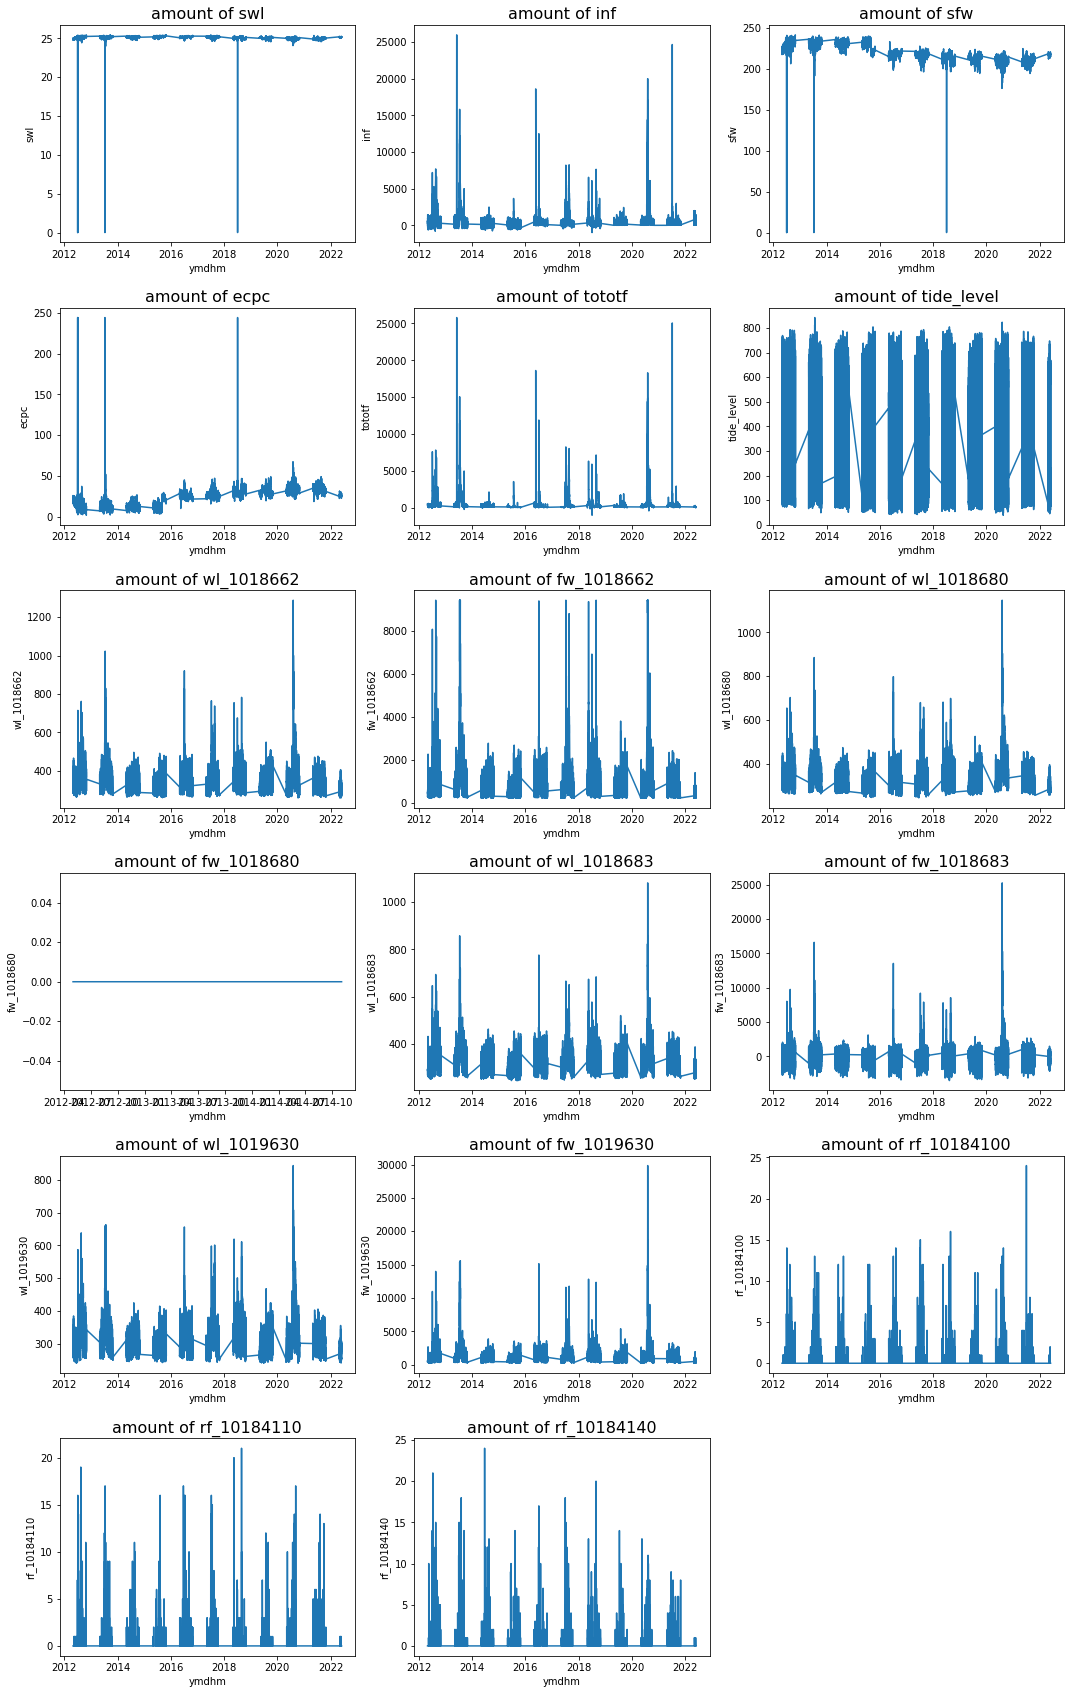

In [22]:
plt.figure(figsize=(18,30))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
for index,col in enumerate(train.columns[1:]):
    plt.subplot(6,3,index+1)
    sns.lineplot(data = train, x = train['ymdhm'], y = train[col])
    plt.title(f'amount of {col}',fontsize = 16)
plt.show()

<AxesSubplot:>

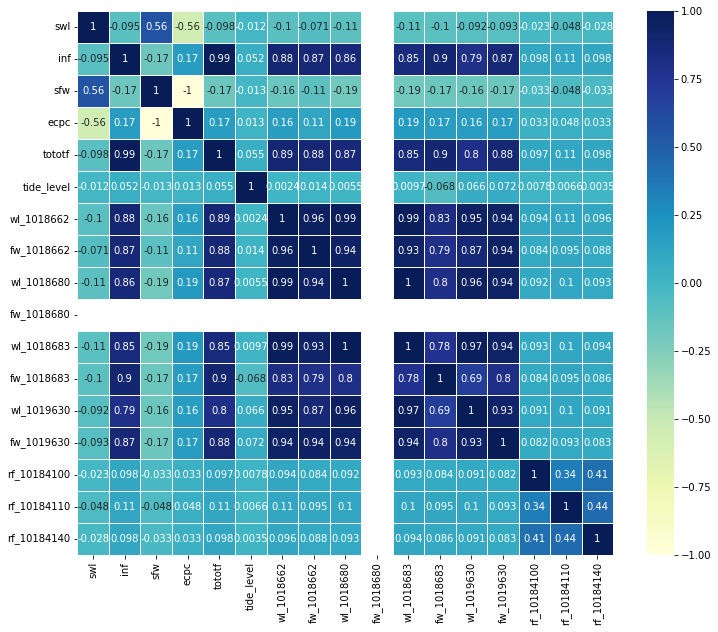

In [23]:
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),
            annot = True,
           cmap = "YlGnBu",
           linewidths = "0.5",
           vmin = -1)

## 결측치 처리

### ckeck missing values

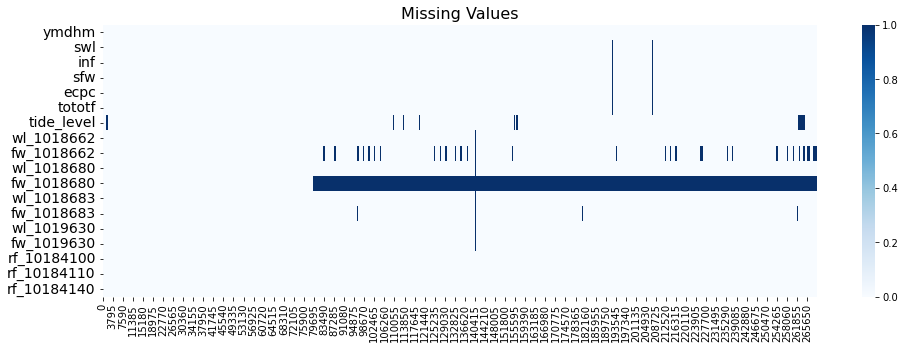

In [24]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(train.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

> fw_1018680 신뢰도 낮음.

### sklearn 으로 MICE 구현

In [25]:
imputed_train = train.copy()
imputed_train = imputed_train.drop(columns='ymdhm')

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,
                      verbose = 2, 
                      max_iter = 30,
                      tol = 1e-10,
                      imputation_order='roman')
# fit on the copied dataset
imp.fit(imputed_train)
print('-------- complete fitting -------')
# transform the copied dataset
imputed_train = pd.DataFrame(imp.transform(imputed_train), columns=imputed_train.columns)

[IterativeImputer] Completing matrix with shape (269424, 17)
[IterativeImputer] Ending imputation round 1/30, elapsed time 1.34
[IterativeImputer] Change: 24518.796213747453, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 2/30, elapsed time 2.66
[IterativeImputer] Change: 993.8869516035043, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 3/30, elapsed time 4.03
[IterativeImputer] Change: 703.8973880451176, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 4/30, elapsed time 5.46
[IterativeImputer] Change: 540.7002459109048, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 5/30, elapsed time 6.82
[IterativeImputer] Change: 415.3085450087033, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 6/30, elapsed time 8.15
[IterativeImputer] Change: 318.9942064979726, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 7/30, elapsed time 9.51
[

In [26]:
train = pd.concat([train.ymdhm, imputed_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269424 entries, 0 to 269423
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        269424 non-null  datetime64[ns]
 1   swl          269424 non-null  float64       
 2   inf          269424 non-null  float64       
 3   sfw          269424 non-null  float64       
 4   ecpc         269424 non-null  float64       
 5   tototf       269424 non-null  float64       
 6   tide_level   269424 non-null  float64       
 7   wl_1018662   269424 non-null  float64       
 8   fw_1018662   269424 non-null  float64       
 9   wl_1018680   269424 non-null  float64       
 10  fw_1018680   269424 non-null  float64       
 11  wl_1018683   269424 non-null  float64       
 12  fw_1018683   269424 non-null  float64       
 13  wl_1019630   269424 non-null  float64       
 14  fw_1019630   269424 non-null  float64       
 15  rf_10184100  269424 non-null  floa

In [ ]:
# 52560 * 10min mean a year
rolling_window = 26496
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=train['ymdhm'], y=train['fw_1018662'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=train['ymdhm'], y=train['fw_1018662'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=train['ymdhm'], y=train['fw_1018662'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
# ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='fw_1018662', fontsize=14)
# ax[0].set_xlim([date(2012, 5, 1), date(2022, 7, 18)])

sns.lineplot(x=train['ymdhm'], y=train['wl_1018680'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=train['ymdhm'], y=train['wl_1018680'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=train['ymdhm'], y=train['wl_1018680'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
# ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='wl_1018680', fontsize=14)
# ax[1].set_xlim([date(2012, 5, 1), date(2022, 7, 18)])

sns.lineplot(x=train['ymdhm'], y=train['wl_1018683'], ax=ax[2], color='dodgerblue')
sns.lineplot(x=train['ymdhm'], y=train['wl_1018683'].rolling(rolling_window).mean(), ax=ax[2], color='black', label='rolling mean')
sns.lineplot(x=train['ymdhm'], y=train['wl_1018683'].rolling(rolling_window).std(), ax=ax[2], color='orange', label='rolling std')
# ax[2].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2].set_ylabel(ylabel='wl_1018683', fontsize=14)
# ax[2].set_xlim([date(2012, 5, 1), date(2022, 7, 18)])

sns.lineplot(x=train['ymdhm'], y=train['wl_1019630'], ax=ax[3], color='dodgerblue')
sns.lineplot(x=train['ymdhm'], y=train['wl_1019630'].rolling(rolling_window).mean(), ax=ax[3], color='black', label='rolling mean')
sns.lineplot(x=train['ymdhm'], y=train['wl_1019630'].rolling(rolling_window).std(), ax=ax[3], color='orange', label='rolling std')
# ax[3].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[3].set_ylabel(ylabel='wl_1019630', fontsize=14)
# ax[3].set_xlim([date(2012, 5, 1), date(2022, 7, 18)])



plt.tight_layout()
plt.show()

## Feature Engineering

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'swl', 'inf', 'sfw','ecpc', 'tototf','tide_level',
    'fw_1018662', 'fw_1018683','fw_1019630','rf_10184100',
    'rf_10184110','rf_10184140'
]

for column in core_columns:
    decomp = seasonal_decompose(train[column], period=26496, model='additive', extrapolate_trend='freq')
    train[f"{column}_trend"] = decomp.trend
    train[f"{column}_seasonal"] = decomp.seasonal

<AxesSubplot:>

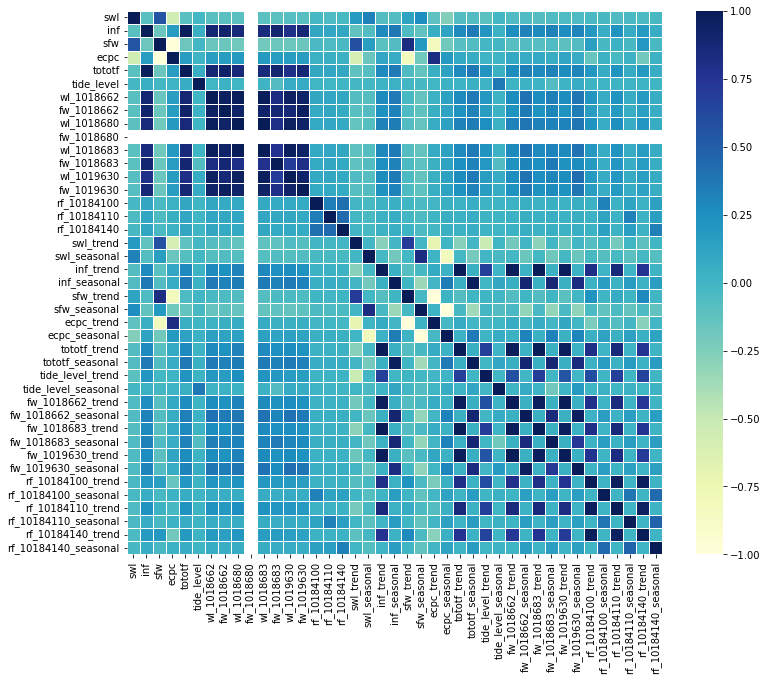

In [28]:
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),
#             annot = True,
           cmap = "YlGnBu",
           linewidths = "0.5",
           vmin = -1)

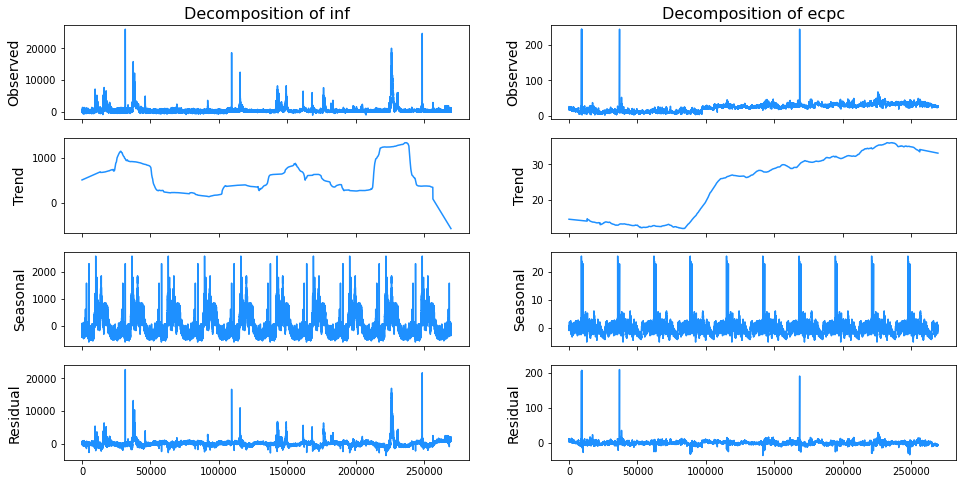

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['inf', 'ecpc']):
    
    res = seasonal_decompose(train[column], period=26496, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [30]:
df = train.copy()

In [31]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['ymdhm', 'wl_1018662']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

229010 40414


In [32]:
from sklearn.preprocessing import MinMaxScaler

data = df.filter(['wl_1018662'])
dataset = data.values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[0.04961089],
       [0.05350195],
       [0.05252918],
       [0.05058366],
       [0.05058366],
       [0.05058366],
       [0.05155642],
       [0.05058366],
       [0.05155642],
       [0.05155642]])

In [33]:
# Defines the rolling window
look_back =26496
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

176018 40414


In [34]:
len(x_train) + len(x_test)

216432

In [35]:
del df_con
del df_water

In [36]:
del df_rf

In [37]:
%%time
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# tf.enable_v2_behavior()

from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()

CPU times: user 138 µs, sys: 613 µs, total: 751 µs
Wall time: 6.03 ms


In [43]:
from tensorflow.python.framework.ops import disable_eager_execution

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

model.summary()

Train on 176018 samples, validate on 40414 samples
Epoch 1/5


2022-08-18 21:44:56.905215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 21:44:57.007421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 21:44:57.093190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


176018/176018 [==============================] - ETA: 0s - loss: 7.1813e-04

2022-08-18 21:49:15.686915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


176018/176018 [==============================] - 302s 2ms/sample - loss: 7.1813e-04 - val_loss: 4.2088e-04
Epoch 2/5
176018/176018 [==============================] - 327s 2ms/sample - loss: 1.4158e-04 - val_loss: 5.1632e-04
Epoch 3/5
176018/176018 [==============================] - 342s 2ms/sample - loss: 1.0843e-04 - val_loss: 5.6734e-04
Epoch 4/5
176018/176018 [==============================] - 347s 2ms/sample - loss: 1.3762e-04 - val_loss: 6.0539e-04
Epoch 5/5
176018/176018 [==============================] - 353s 2ms/sample - loss: 1.0645e-04 - val_loss: 4.1270e-04
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 128)            13632000  
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_

In [41]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

2022-08-18 22:12:50.890274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


RMSE: 20.88378998206707


In [44]:
from sklearn.metrics import r2_score

score_r2 = r2_score(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'r2: {}'.format(score_r2))

r2: 0.8466134149003122


In [45]:
print(Fore.GREEN + 'rmse/r2: {}'.format(score_rmse/score_r2))

rmse/r2: 24.66744515798408


In [ ]:

feature_columns = [
    'swl','inf','sfw','ecpc','tototf','tide_level',
    'wl_1018662','fw_1018662','wl_1018680','fw_1018680',
    'wl_1018683','fw_1018683','wl_1019630','fw_1019630',
    'rf_10184100','rf_10184110','rf_10184140','swl_trend',
    'swl_seasonal','inf_trend','inf_seasonal','sfw_trend',
    'sfw_seasonal','ecpc_trend','ecpc_seasonal','tototf_trend',
    'tototf_seasonal','tide_level_trend','tide_level_seasonal',
    'fw_1018662_trend','fw_1018662_seasonal','fw_1018683_trend',
    'fw_1018683_seasonal','fw_1019630_trend','fw_1019630_seasonal',
    'rf_10184100_trend','rf_10184100_seasonal','rf_10184110_trend',
    'rf_10184110_seasonal','rf_10184140_trend','rf_10184140_seasonal'
]
target_column = ['wl_1018662']

train_size = int(0.85 * len(df))

multivariate_df = df[['ymdhm'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [i for i in range(len(feature_columns)+2) if i != 1]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [i for i in range(len(feature_columns)+2) if i != 1]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

## 시각화

In [ ]:
plt.figure(figsize=(18,30))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
for index,col in enumerate(train.columns[1:]):
    plt.subplot(6,3,index+1)
    sns.lineplot(data = train, x = train['ymdhm'], y = train[col])
    plt.title(f'amount of {col}',fontsize = 16)
plt.show()

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),
            annot = True,
           cmap = "YlGnBu",
           linewidths = "0.5",
           vmin = -1)

### Train data visualize

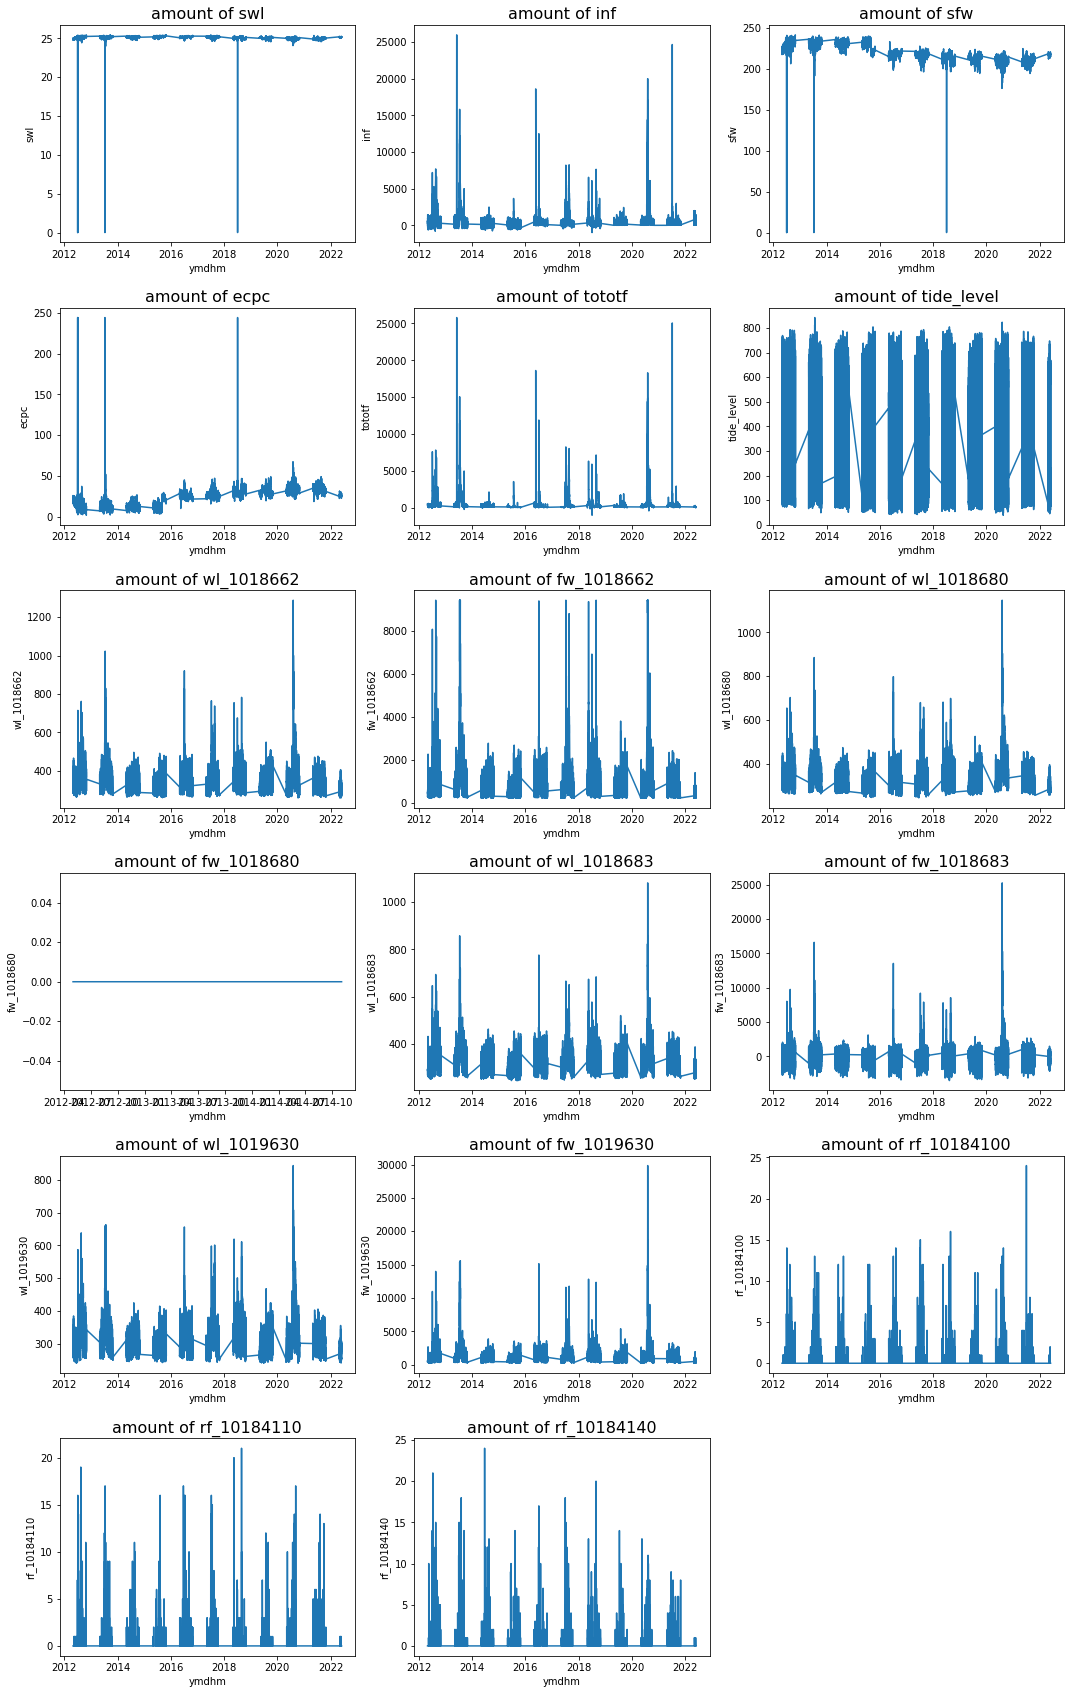

In [14]:
plt.figure(figsize=(18,30))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
for index,col in enumerate(train.columns[1:]):
    plt.subplot(6,3,index+1)
    sns.lineplot(data = train, x = train['ymdhm'], y = train[col])
    plt.title(f'amount of {col}',fontsize = 16)
plt.show()

<AxesSubplot:>

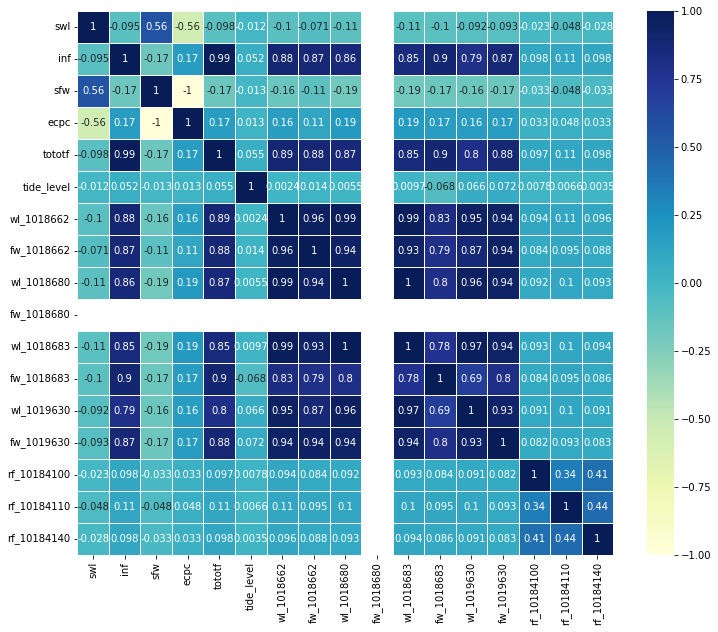

In [15]:
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),
            annot = True,
           cmap = "YlGnBu",
           linewidths = "0.5",
           vmin = -1)

### 3. 전처리

#### 결측치 처리

fw_1018680 드롭하자 0 채워도 의미가 없다

drop 하기엔 feature가 너무 중요한데...

### fw_1018680 drop 보류

In [26]:
# 결측치가 있는 column
# df = df.drop(columns='fw_1018680')
# df

<AxesSubplot:ylabel='tide_level'>

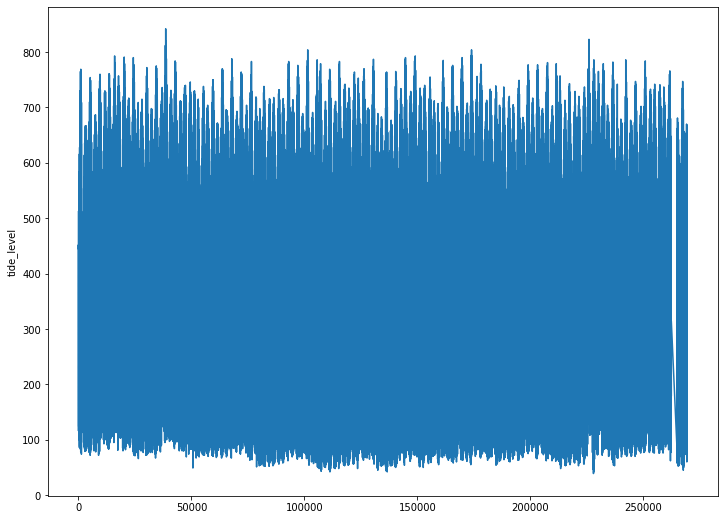

In [28]:
plt.figure(figsize = (12,9))
sns.lineplot(data = train.tide_level)

> NaN 값과 0 값.

<AxesSubplot:xlabel='ymdhm', ylabel='swl'>

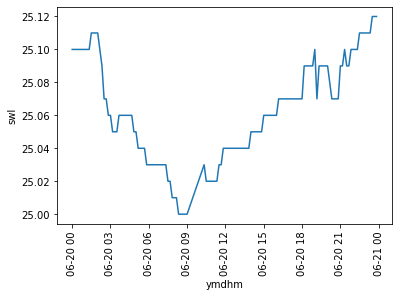

In [30]:
df_year = test[test['ymdhm'].dt.year == 2022]
df_month = df_year[df_year['ymdhm'].dt.month == 6]
df_day = df_month[df_month['ymdhm'].dt.day == 20]
plt.xticks(rotation = 90)
sns.lineplot(data = df_day, x = df_day.ymdhm, y = df_day.swl)

#### 결측치 채우기 딥러닝 모델 - datawig

In [ ]:
import datawig

아무래도 CUDA가 선행 설치되어야 하는데, 엔비디아에서 더이상 macOS에 대해 지원을 하지 않는다고 한다..
AMD니까.. 뭐..

## 1차 모델링
### 시계열
---
Prophet
> Prophet 학습을 위해 결측치 채워야함

### sklearn 으로 MICE 구현

In [52]:
# prophet_train = train.copy()
# prophet_train = prophet_train.drop(columns='ymdhm') # MICE에는 datetime 못들어감

In [53]:
prophet_2012 = train[train.ymdhm.dt.year == 2012]
prophet_2012 = prophet_2012.drop(columns='ymdhm')

In [54]:
prophet_2012

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,25.250,270.2,235.01,8.99,270.2,300.0,372.7,1018.67,364.2,0.0,365.0,1395.30,351.3,1837.11,0.0,0.0,0.0
26492,25.250,264.1,235.01,8.99,264.1,286.0,365.7,945.75,359.2,0.0,362.0,1154.21,350.3,1814.92,0.0,0.0,0.0
26493,25.250,257.9,235.01,8.99,257.9,273.0,362.7,915.35,356.2,0.0,359.0,968.58,349.3,1792.88,0.0,0.0,0.0
26494,25.250,264.1,235.01,8.99,264.1,261.0,355.7,846.39,352.2,0.0,356.0,776.99,346.3,1727.56,0.0,0.0,0.0


In [55]:
# MICE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,
                      verbose = 2, 
                      max_iter = 30,
                      tol = 1e-10,
                      imputation_order='roman')
# imputation_order parameter
# - `'ascending'`: From features with fewest missing values to most.
# - `'descending'`: From features with most missing values to fewest.
# - `'roman'`: Left to right.
# - `'arabic'`: Right to left.
# - `'random'`: A random order for each round.

# fit on the copied dataset
imp.fit(prophet_2012)
print('-------- complete fitting -------')
# transform the copied dataset
prophet_2012 = pd.DataFrame(imp.transform(prophet_2012), columns=prophet_2012.columns)

[IterativeImputer] Completing matrix with shape (26496, 17)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.15
[IterativeImputer] Change: 246.50971031261645, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.27
[IterativeImputer] Change: 86.73134331669621, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.38
[IterativeImputer] Change: 65.20674218605492, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.53
[IterativeImputer] Change: 48.8582869499146, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.66
[IterativeImputer] Change: 36.60760815068437, scaled tolerance: 1.3983590000000002e-06 
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.78
[IterativeImputer] Change: 27.428645476375152, scaled tolerance: 1.3983590000000002e-06 
[Iterativ

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [56]:
prophet_2012.info() # 결측치 채워진거 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   swl          26496 non-null  float64
 1   inf          26496 non-null  float64
 2   sfw          26496 non-null  float64
 3   ecpc         26496 non-null  float64
 4   tototf       26496 non-null  float64
 5   tide_level   26496 non-null  float64
 6   wl_1018662   26496 non-null  float64
 7   fw_1018662   26496 non-null  float64
 8   wl_1018680   26496 non-null  float64
 9   fw_1018680   26496 non-null  float64
 10  wl_1018683   26496 non-null  float64
 11  fw_1018683   26496 non-null  float64
 12  wl_1019630   26496 non-null  float64
 13  fw_1019630   26496 non-null  float64
 14  rf_10184100  26496 non-null  float64
 15  rf_10184110  26496 non-null  float64
 16  rf_10184140  26496 non-null  float64
dtypes: float64(17)
memory usage: 3.4 MB


In [60]:
prophet_2012.wl_1018662

0        310.7
1        314.7
2        313.7
3        311.7
4        311.7
         ...  
26491    372.7
26492    365.7
26493    362.7
26494    355.7
26495    356.7
Name: wl_1018662, Length: 26496, dtype: float64

In [73]:
prophet_2012 = pd.concat([train[train.ymdhm.dt.year == 2012].ymdhm,prophet_2012.wl_1018662], axis =1)

In [76]:
# prophet을 위한 컬럼명 변경
prophet_2012.columns = ['ds', 'y']
prophet_2012

,ds,y
0,2012-05-01 00:00:00,310.7
1,2012-05-01 00:10:00,314.7
2,2012-05-01 00:20:00,313.7
3,2012-05-01 00:30:00,311.7
4,2012-05-01 00:40:00,311.7
...,...,...
26491,2012-10-31 23:10:00,372.7
26492,2012-10-31 23:20:00,365.7
26493,2012-10-31 23:30:00,362.7
26494,2012-10-31 23:40:00,355.7


# reduce memory usage
---

In [161]:
def reduce_mem_usage(props, print_mode=False):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    if print_mode:
        print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in.
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            if print_mode:
                print("******************************")
                print("Column: ",col)
                print("dtype before: ",props[col].dtype)

            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
           # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
           
            # Print new column type
            if print_mode:
                print("dtype after: ",props[col].dtype)
                print("******************************")

    # Print final result
    if print_mode:
        print("___MEMORY USAGE AFTER COMPLETION:___")
        mem_usg = props.memory_usage().sum() / 1024**2
        print("Memory usage is: ",mem_usg," MB")
        print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [162]:
data_reducing = True

In [163]:
# Reducing DataFrame memory ~65%
if data_reducing:
    props, NAlist = reduce_mem_usage(prophet_train1, print_mode = True)
    print("_________________")
    print("")
    if NAlist:
        print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
        print("_________________")
        print("")
        print(NAlist)

Memory usage of properties dataframe is : 2.0556640625  MB
******************************
Column:  ds
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  y
dtype before:  float32
dtype after:  float32
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  2.0556640625  MB
This is  100.0 % of the initial size
_________________



/var/folders/3d/fksyvw8102q5p7zbsjrk_qs80000gn/T/ipykernel_81019/586095519.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  props[col] = props[col].astype(np.float32)


---

In [77]:
from fbprophet import Prophet # prophet module

In [78]:
m = Prophet()
m.fit(prophet_2012)

future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -101.303
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       58209.1     0.0731206       10505.2           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       59033.3     0.0229824       3267.51           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       59350.5    0.00721326       929.059           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       59479.6     0.0057465       1214.34           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       60007.8    0.00864676       4644.38      0.7882      0.7882      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


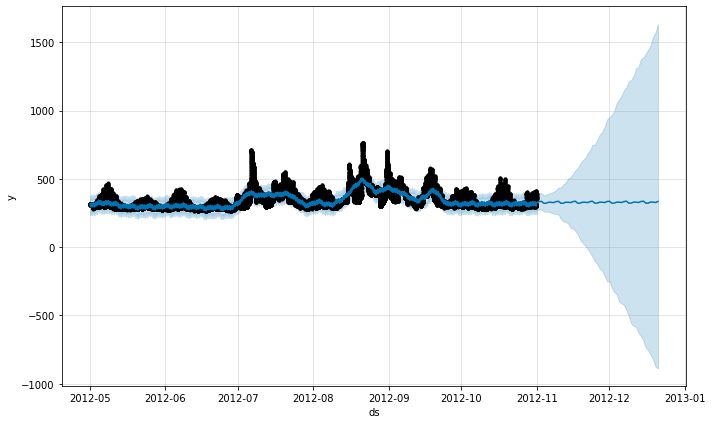

In [79]:
fig1 = m.plot(forecast)

In [89]:
imputed_train = train.copy()
imputed_train = imputed_train.drop(columns='ymdhm')

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,
                      verbose = 2, 
                      max_iter = 30,
                      tol = 1e-10,
                      imputation_order='roman')
# fit on the copied dataset
imp.fit(imputed_train)
print('-------- complete fitting -------')
# transform the copied dataset
imputed_train = pd.DataFrame(imp.transform(imputed_train), columns=imputed_train.columns)

[IterativeImputer] Completing matrix with shape (269424, 17)
[IterativeImputer] Ending imputation round 1/30, elapsed time 1.36
[IterativeImputer] Change: 24518.796213747453, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 2/30, elapsed time 2.71
[IterativeImputer] Change: 993.8869516035043, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 3/30, elapsed time 4.02
[IterativeImputer] Change: 703.8973880451176, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 4/30, elapsed time 5.37
[IterativeImputer] Change: 540.7002459109048, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 5/30, elapsed time 6.73
[IterativeImputer] Change: 415.3085450087033, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 6/30, elapsed time 8.17
[IterativeImputer] Change: 318.9942064979726, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 7/30, elapsed time 9.59
[

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Ending imputation round 3/30, elapsed time 0.18
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.25
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.30
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.36
[IterativeImputer] Ending imputation round 7/30, elapsed time 0.42
[IterativeImputer] Ending imputation round 8/30, elapsed time 0.47
[IterativeImputer] Ending imputation round 9/30, elapsed time 0.53
[IterativeImputer] Ending imputation round 10/30, elapsed time 0.58
[IterativeImputer] Ending imputation round 11/30, elapsed time 0.64
[IterativeImputer] Ending imputation round 12/30, elapsed time 0.70
[IterativeImputer] Ending imputation round 13/30, elapsed time 0.75
[IterativeImputer] Ending imputation round 14/30, elapsed time 0.81
[IterativeImputer] Ending imputation round 15/30, elapsed time 0.87
[IterativeImputer] Ending imputation round 16/30, elapsed time 0.92
[IterativeImputer] Ending imputation round 17/30, elaps

In [95]:
imputed_train = pd.concat([train.ymdhm,imputed_train.wl_1018662], axis = 1)

In [100]:
imputed_train.columns = ['ds', 'y']

In [101]:
imputed_train

,ds,y
0,2012-05-01 00:00:00,310.7
1,2012-05-01 00:10:00,314.7
2,2012-05-01 00:20:00,313.7
3,2012-05-01 00:30:00,311.7
4,2012-05-01 00:40:00,311.7
...,...,...
269419,2022-05-31 23:10:00,281.7
269420,2022-05-31 23:20:00,279.7
269421,2022-05-31 23:30:00,278.7
269422,2022-05-31 23:40:00,277.7


In [102]:
m = Prophet()
m.fit(imputed_train)

future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -568.36
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99        656703    0.00642103       43356.3           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        658754    0.00330108       8536.83           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        659143     0.0031134       10592.1           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        660017   0.000535983       13839.9           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        660394   0.000521506       6746.27      0.6582      0.6582      571   
   

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


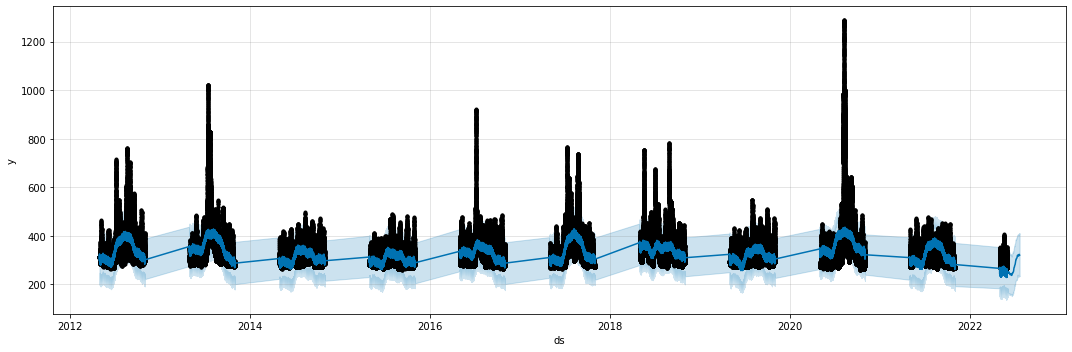

In [110]:
fig1 = m.plot(forecast, figsize = (15, 5))

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


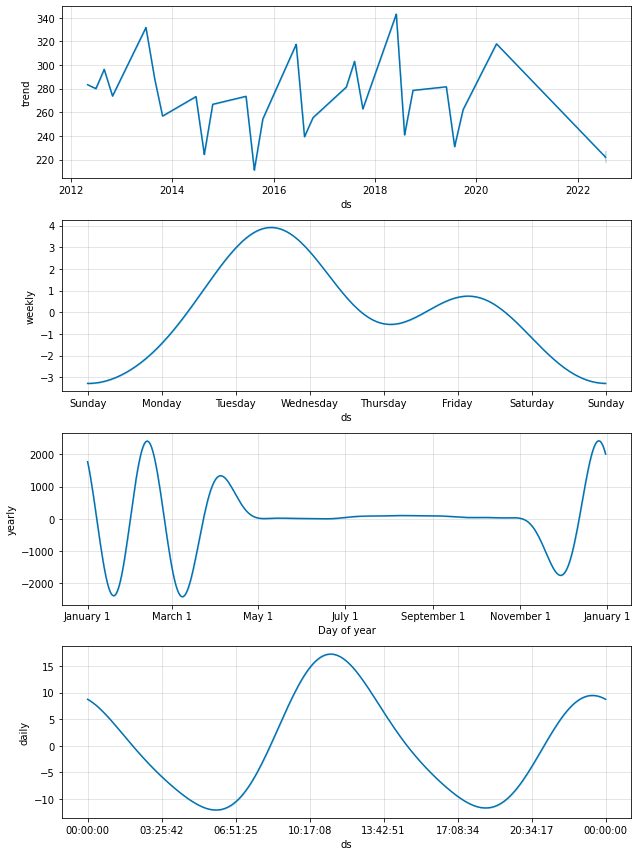

In [111]:
fig2 = m.plot_components(forecast)

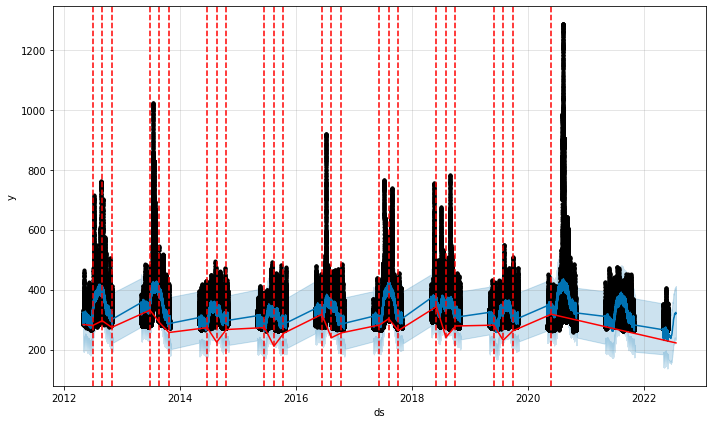

In [112]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -568.36
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99        656727    0.00282116       30851.1           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        658934    0.00259648       10786.7      0.9513      0.9513      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        659926    0.00585536       28073.2      0.9145      0.9145      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        660825    0.00796389        104648      0.2715      0.2715      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        661676     0.0228218       19350.7           1           1      546   
   

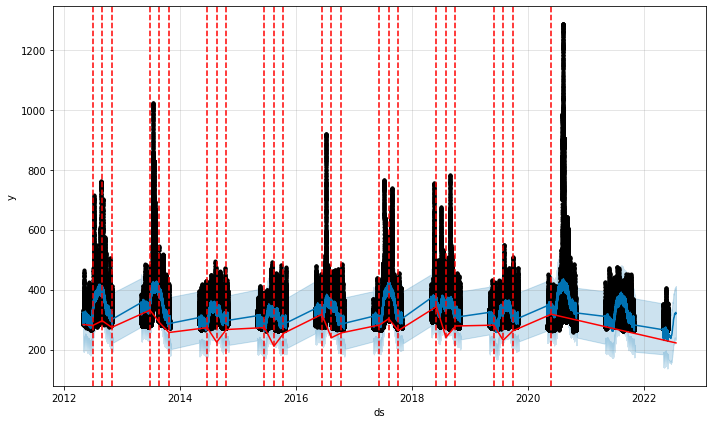

In [114]:
m = Prophet(changepoint_prior_scale=0.3)
m.fit(imputed_train)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -568.36
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99        657928    0.00403673       39497.7      0.4044           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        660020    0.00132956       20687.6           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        660613    0.00583727       12299.7           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        661284     0.0101954       38936.3           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        661751   0.000717998       5227.93           1           1      561   
   

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


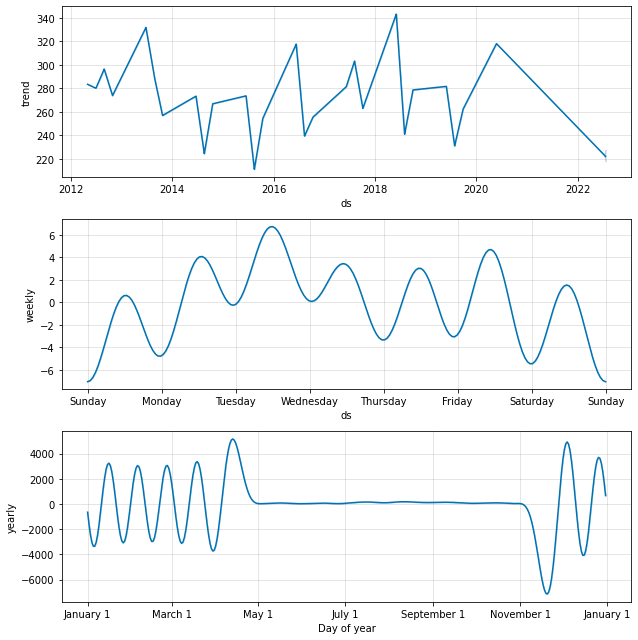

In [139]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(imputed_train)
fig = m.plot_components(forecast)

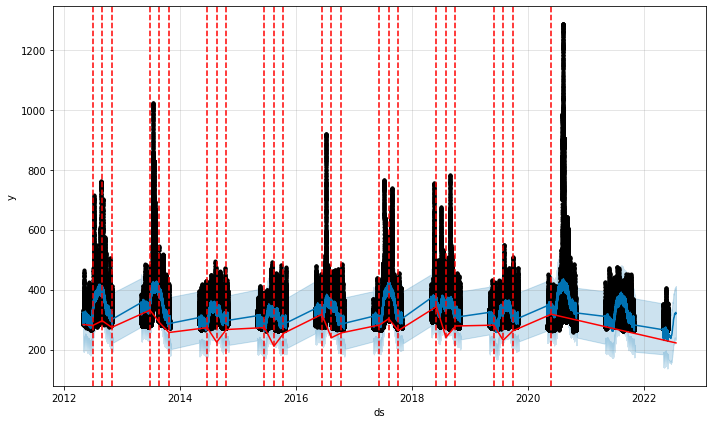

In [140]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

<AxesSubplot:xlabel='ds'>

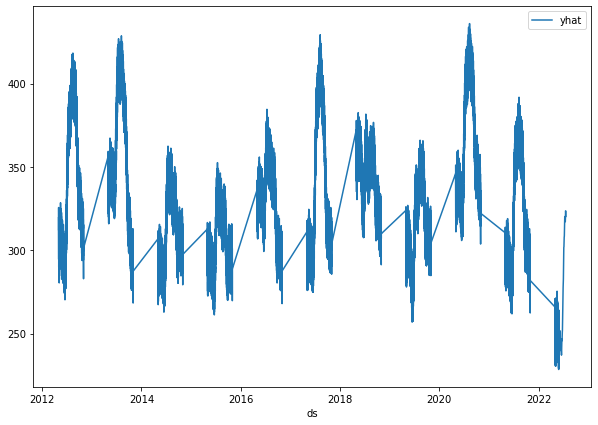

In [141]:
plt.figure(figsize=(10,7))
sns.lineplot(data = forecast[['ds', 'yhat']].set_index('ds'))

<AxesSubplot:xlabel='ymdhm'>

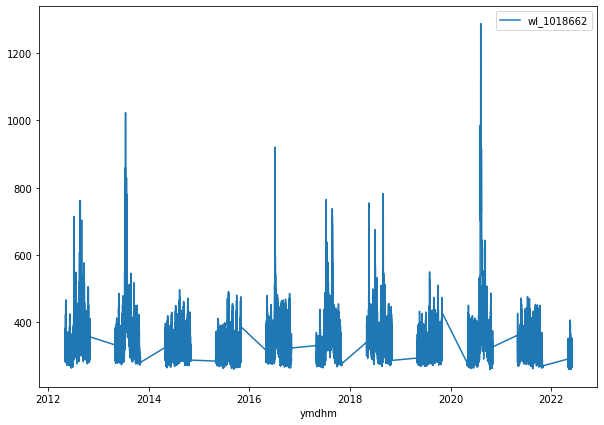

In [142]:
plt.figure(figsize=(10,7))
sns.lineplot(data = train[['ymdhm','wl_1018662']].set_index('ymdhm'))

<AxesSubplot:xlabel='ymdhm'>

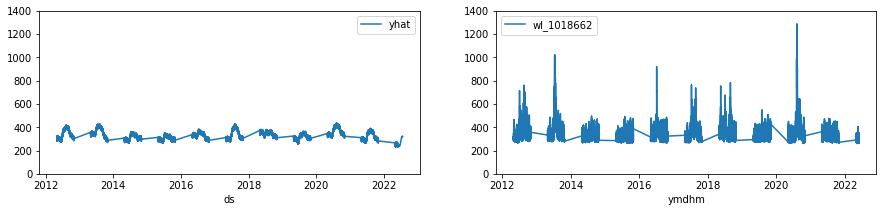

In [150]:
plt.figure(figsize=(15,3))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.subplot(1,2,1)
plt.ylim(0, 1400)
sns.lineplot(data = forecast[['ds', 'yhat']].set_index('ds'))
plt.subplot(1,2,2)
plt.ylim(0, 1400)
sns.lineplot(data = train[['ymdhm','wl_1018662']].set_index('ymdhm'))

In [151]:
train.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,268717.000000,268717.000000,268717.000000,268717.000000,268717.000000,264501.000000,269365.000000,254260.000000,269365.000000,79487.0,269365.000000,268145.000000,269365.000000,269365.000000,269424.000000,269424.000000,269424.000000
mean,25.073780,543.865073,219.580928,24.419672,538.271792,346.990492,329.081794,724.757597,315.837039,0.0,312.397253,596.146406,299.899358,1053.524860,0.032781,0.037046,0.034826
std,0.464301,1106.964561,10.649665,10.649281,1102.754456,174.592926,76.033203,894.117343,67.132736,0.0,63.498719,1371.762458,51.168294,1422.765093,0.331685,0.364152,0.355534
min,0.000000,-990.000000,-0.010000,2.150000,-990.000000,39.000000,259.700000,243.290000,246.200000,0.0,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.200000,212.140000,14.390000,132.000000,193.000000,287.700000,337.640000,278.200000,0.0,275.000000,205.230000,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.109000,248.000000,217.970000,26.030000,174.300000,328.000000,307.700000,461.960000,297.200000,0.0,295.000000,354.330000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.193000,522.000000,229.610000,31.860000,497.400000,489.000000,342.700000,743.640000,329.200000,0.0,327.000000,704.440000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,244.010000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,0.0,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

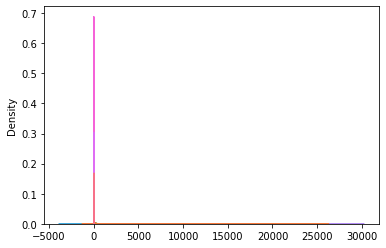

In [162]:
sns.kdeplot(data = train, legend=False)

/Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

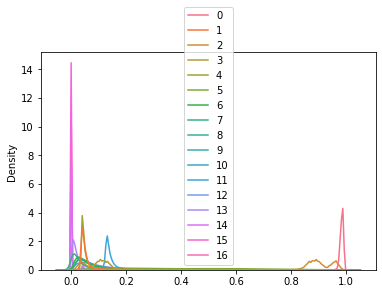

In [165]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(train.drop(columns='ymdhm'))
sns.kdeplot(data = pd.DataFrame(minmax_scaled))

## Neural Prophet

In [208]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import plotly.express as px
set_log_level("ERROR")

In [217]:
col_lst = ['swl','inf','sfw','ecpc','tototf','tide_level',
           'fw_1018662','wl_1018680','fw_1018680','wl_1018683',
           'fw_1018683','wl_1019630','fw_1019630','rf_10184100',
           'rf_10184110','rf_10184140']

In [224]:
train_neuprop = train.rename(columns={"ymdhm":"ds","wl_1018662":"y"})
train_neuprop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269424 entries, 0 to 269423
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ds           269424 non-null  datetime64[ns]
 1   swl          268717 non-null  float64       
 2   inf          268717 non-null  float64       
 3   sfw          268717 non-null  float64       
 4   ecpc         268717 non-null  float64       
 5   tototf       268717 non-null  float64       
 6   tide_level   264501 non-null  float64       
 7   y            269365 non-null  float64       
 8   fw_1018662   254260 non-null  float64       
 9   wl_1018680   269365 non-null  float64       
 10  fw_1018680   79487 non-null   float64       
 11  wl_1018683   269365 non-null  float64       
 12  fw_1018683   268145 non-null  float64       
 13  wl_1019630   269365 non-null  float64       
 14  fw_1019630   269365 non-null  float64       
 15  rf_10184100  269424 non-null  floa

In [227]:
train_impu_neuprop = train_neuprop.drop(columns='ds')

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,
                      verbose = 2, 
                      max_iter = 30,
                      tol = 1e-10,
                      imputation_order='roman')
# fit on the copied dataset
imp.fit(train_impu_neuprop)
print('-------- complete fitting -------')
# transform the copied dataset
train_impu_neuprop = pd.DataFrame(imp.transform(train_impu_neuprop), columns=train_impu_neuprop.columns)
train_impu_neuprop

[IterativeImputer] Completing matrix with shape (269424, 17)
[IterativeImputer] Ending imputation round 1/30, elapsed time 1.27
[IterativeImputer] Change: 24518.796213747453, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 2/30, elapsed time 2.55
[IterativeImputer] Change: 993.8869516035043, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 3/30, elapsed time 3.76
[IterativeImputer] Change: 703.8973880451176, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 4/30, elapsed time 4.95
[IterativeImputer] Change: 540.7002459109048, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 5/30, elapsed time 6.18
[IterativeImputer] Change: 415.3085450087033, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 6/30, elapsed time 7.48
[IterativeImputer] Change: 318.9942064979726, scaled tolerance: 2.985412e-06 
[IterativeImputer] Ending imputation round 7/30, elapsed time 8.82
[

WARNING - (py.warnings._showwarnmsg) - /Users/blackcow/miniforge3/envs/tf25/lib/python3.8/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(

  warnings.warn(



[IterativeImputer] Ending imputation round 30/30, elapsed time 38.30
[IterativeImputer] Change: 6.4810630845495325, scaled tolerance: 2.985412e-06 
-------- complete fitting -------
[IterativeImputer] Completing matrix with shape (269424, 17)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.07
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.16
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.22
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.27
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.33
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.38
[IterativeImputer] Ending imputation round 7/30, elapsed time 0.44
[IterativeImputer] Ending imputation round 8/30, elapsed time 0.50
[IterativeImputer] Ending imputation round 9/30, elapsed time 0.55
[IterativeImputer] Ending imputation round 10/30, elapsed time 0.61
[IterativeImputer] Ending imputation round 11/30, elapsed time 0.67
[IterativeImputer]

,swl,inf,sfw,ecpc,tototf,tide_level,y,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269419,25.180,140.94,217.99,26.01,140.94,220.0,281.7,285.72,281.2,0.0,278.0,575.57,271.3,493.58,0.0,0.0,0.0
269420,25.180,141.07,217.99,26.01,141.07,208.0,279.7,274.78,279.2,0.0,278.0,501.04,272.3,505.03,0.0,0.0,0.0
269421,25.180,141.01,217.99,26.01,141.01,196.0,278.7,269.40,277.2,0.0,277.0,425.89,272.3,505.03,0.0,0.0,0.0
269422,25.190,755.75,218.36,25.64,140.75,184.0,277.7,264.07,276.2,0.0,276.0,198.19,271.3,493.58,0.0,0.0,0.0


In [240]:
train_impu_neuprop = pd.concat([train.rename(columns={'ymdhm':'ds'}).ds, train_impu_neuprop], axis = 1)

In [246]:
train_impu_neuprop.ds

0        2012-05-01 00:00:00
1        2012-05-01 00:10:00
2        2012-05-01 00:20:00
3        2012-05-01 00:30:00
4        2012-05-01 00:40:00
                 ...        
269419   2022-05-31 23:10:00
269420   2022-05-31 23:20:00
269421   2022-05-31 23:30:00
269422   2022-05-31 23:40:00
269423   2022-05-31 23:50:00
Name: ds, Length: 269424, dtype: datetime64[ns]

In [242]:
m = NeuralProphet(
    n_forecasts=48, #8시간 예측
    n_lags = 1, #1시간 뒤 regressor 지연 반영
    weekly_seasonality=3, #주간 계절성 설정
    daily_seasonality=5, #일간 계절성 설정
    d_hidden=128, #은닉층 뉴런 설정
    learning_rate=0.01, #학습률 설정
    batch_size=128, #배치 사이즈 설정
    epochs=200, #학습 횟수
)

#독립 변인(변수) 추가 및 정규화
m = m.add_lagged_regressor(names=col_lst, normalize="minmax") 

#학습 수행
metrics = m.fit(train_impu_neuprop, freq='10min', validation_df=test, progress='plot')

ValueError: More than 30 consecutive missing values encountered in column y. 260718 NA remain. Please preprocess data manually.

In [185]:
#모델 설정
m = NeuralProphet(
    learning_rate=0.1, 
)
#모델 학습
metrics = m.fit(imputed_train, freq="10min")

In [203]:
train_pred[-31*24*6:]

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
264960,2022-05-01 00:00:00,290.7,271.595215,-19.104785,308.190247,-43.512783,-1.618257,8.536009
264961,2022-05-01 00:10:00,291.7,271.204681,-20.495319,308.189484,-43.522453,-1.616203,8.153850
264962,2022-05-01 00:20:00,290.7,270.731232,-19.968768,308.188690,-43.532108,-1.614083,7.688734
264963,2022-05-01 00:30:00,289.7,270.182556,-19.517444,308.187897,-43.541744,-1.611898,7.148295
264964,2022-05-01 00:40:00,287.7,269.566986,-18.133014,308.187134,-43.551350,-1.609649,6.540844
...,...,...,...,...,...,...,...,...
269419,2022-05-31 23:10:00,281.7,271.314240,-10.385760,304.700378,-43.981373,1.601071,8.994184
269420,2022-05-31 23:20:00,279.7,271.408661,-8.291339,304.699554,-43.989853,1.587624,9.111339
269421,2022-05-31 23:30:00,278.7,271.395020,-7.304980,304.698761,-43.998344,1.574025,9.120586
269422,2022-05-31 23:40:00,277.7,271.276367,-6.423633,304.697998,-44.006817,1.560276,9.024909


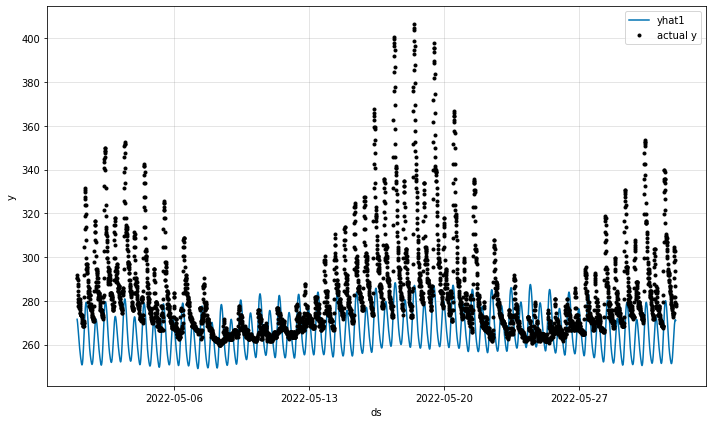

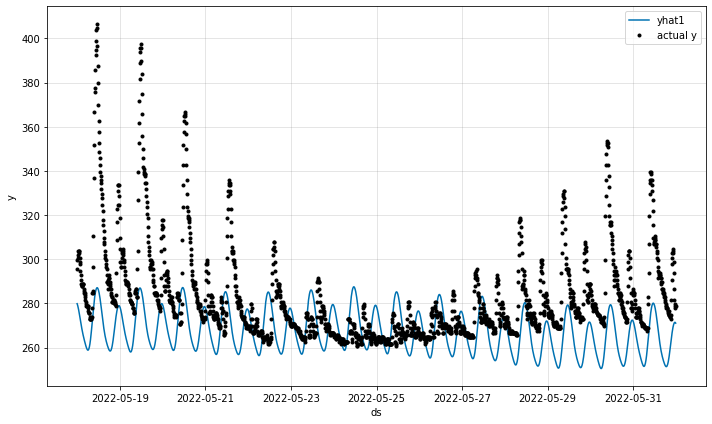

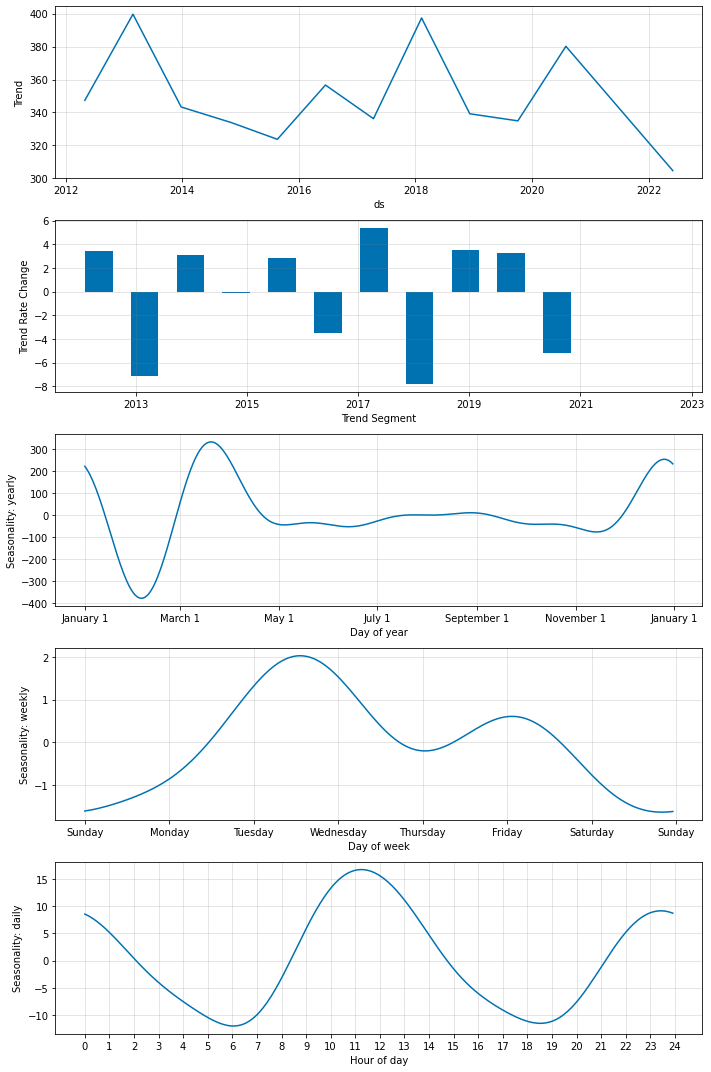

In [204]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(imputed_train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred[-31*24*6:])
fig2 = m.plot(train_pred[-14*24*6:])
# comp = m.plot_components(train_pred)
param = m.plot_parameters()

In [205]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

col = "wl_1018662"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**2)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== wl_1018662 Evaluate Result============
MAE : 38.63748225669669
MSE : 4588.940004711357
RMSE : 21058370.366840266
MAPE : 0.1139695198327079


##  IMPUTEED DATAFRAME

In [ ]:
imputed_df.fw_1018680.value_counts()

In [ ]:
df.fw_1018680.value_counts()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(imputed_df.corr(),
           cmap = 'YlGnBu',
           annot = True,
           linewidths=0.5)

## Before IMPUTE

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),
            annot = True,
           cmap = "YlGnBu",
           linewidths = "0.5",
           vmin = -1)

In [ ]:
# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
correlated_features = 

In [ ]:
#### 다중공선성 처리
#### Encoding Categorical Features
# dtype이 object인 변수들 처리.



In [ ]:
#### feature extraction

- 차원의 저주를 해결하거나, 데이터의 feature 조합을 이용하는 새로운 feature를 생성할 때, PCA를 사용합니다.

- 분석에 사용할 feature를 선택하는 과정도 포함합니다.

In [ ]:
# PCA 적용
from sklearn.decomposition import PCA

if feature_reducing:
    pca = PCA(n_components=0.9) # PCA(n_components=6)
    pca_data = pca.fit_transform(X)

In [ ]:
### 4. 학습 데이터 분할

In [ ]:
# 첫번째 테스트용으로 사용하고, 실제 학습시에는 K-Fold CV를 사용합니다.
# train : test = 8 : 2
from sklearn.model_selection import train_test_split

X = 
y =

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
### 5. 학습 및 평가

In [ ]:
# 간단하게 LightGBM 테스트
# 적당한 hyper-parameter 조합을 두었습니다. (항상 best는 아닙니다. 예시입니다.)

param_grid = {
    "max_bin" : 20,
    "learning_rate" : 0.0025,
    "objective" : "regression",
    "boosting_type" : "gbdt",
    "metric" : "mae",
    "sub_feature" : 0.345,
    "bagging_fraction" : 0.85,
    "bagging_freq" : 40,
    "num_leaves" : 512,
    "min_data" : 500,
    "min_hessian" : 0.05,
    "verbose" : 2,
    "feature_fraction_seed" : 2,
    "bagging_seed" : 3
}

model = LGBMRegressor(**param_grid)

In [ ]:
print("\nFitting LightGBM...")
model.fit(X_train, y_train)

In [ ]:
# metric은 그때마다 맞게 바꿔줘야 합니다.
evaluation_metric = 

In [ ]:
print("Prediction")
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)


train_score = evaluation_metric(y_train, pred_train)
test_score = evaluation_metric(y_test, pred_test)

print("Train Score : %.4f" % train_score)
print("Test Score : %.4f" % test_score)

### 6. Hyper-parameter Tuning

> GridSearchCV

** LightGBM의 hyperparameter **

[Official Documentation] https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html 

[Blog 1] https://smecsm.tistory.com/133

[Blog 2] https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5

[Blog 3] https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/

In [ ]:
# GridSearchCV를 이용하여 가장 좋은 성능을 가지는 모델을 찾아봅시다. (이것은 첫번째엔 선택입니다.)
# Lightgbm은 hyper-parameter의 영향을 많이 받기 때문에, 저는 보통 맨처음에 한번 정도는 가볍게 GCV를 해봅니다.
# 성능 향상이 별로 없다면, lightgbm으로 돌린 대략적인 성능이 이 정도라고 생각하면 됩니다.
# 만약 성능 향상이 크다면, 지금 데이터는 hyper-parameter tuning을 빡빡하게 하면 성능 향상이 많이 이끌어 낼 수 있습니다.

from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [8, 16, None],
    "n_estimators" : [100, 300, 500],
    "max_bin" : [20],
    "learning_rate" : [0.001, 0.0025, 0.003],
    "objective" : ["regression"],
    "boosting_type" : ["gbdt"],
    "metric" : ["mae"],
    "sub_feature" : [0.345],
    "bagging_fraction" : [0.7, 0.75, 0.85],
    "bagging_freq" : [40],
    "num_leaves" : [256, 512],
    "min_data" : [500],
    "verbose" : [-1], # 필수
    "min_hessian" : [0.05],
    "feature_fraction_seed" : [2],
    "bagging_seed" : [3]
}


gcv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                  n_jobs=-1, verbose=1)

gcv.fit(X_train, y_train)
print("Best Estimator : ", gcv.best_estimator_)

In [ ]:
print("Prediction with Best Estimator")
gcv_pred_train = gcv.predict(X_train)
gcv_pred_test = gcv.predict(x_test)

gcv_train_score = evaluation_metric(y_train, gcv_pred_train)
gcv_test_score = evaluation_metric(y_test, gcv_pred_test)

print("Train MAE Score : %.4f" % gcv_train_score)
print("Test MAE Score : %.4f" % gcv_test_score)

In [ ]:
print("Performance Gain") # 이걸로 성능 향상 확인.
print("in train : ", (train_score - gcv_train_score))
print("in test : ", (test_score - gcv_test_score))

> optuna를 사용해봅시다 !

In [ ]:
def optimizer(trial, X, y, K):
    # 조절할 hyper-parameter 조합을 적어줍니다.
    n_estimators = 
    max_depth = 
    max_features = 
    
    
    # 원하는 모델을 지정합니다, optuna는 시간이 오래걸리기 때문에 저는 보통 RF로 일단 테스트를 해본 뒤에 LGBM을 사용합니다.
    model = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features)
    
    
    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K)
    losses = []
    
    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]
        
        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        loss = mean_absolute_error(y_val, preds)
        losses.append(loss)
    
    
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(losses)

In [ ]:
K = # Kfold 수
opt_func = partial(optimizer, X=X_train, y=y_train, K)

study = optuna.create_study(direction="minimize") # 최소/최대 어느 방향의 최적값을 구할 건지.
study.optimize(opt_func, n_trials=5)

In [ ]:
# optuna가 시도했던 모든 실험 관련 데이터
study.trials_dataframe()

In [ ]:
print("Best Score: %.4f" % study.best_value) # best score 출력
print("Best params: ", study.best_trial.params) # best score일 때의 하이퍼파라미터들

In [ ]:
# 실험 기록 시각화
optuna.visualization.plot_optimization_history(study)

In [ ]:
# hyper-parameter들의 중요도
optuna.visualization.plot_param_importances(study)

### 7. 테스트 및 제출 파일 생성

In [ ]:
model = RandomForestRegressor(n_estimators=study.best_trial.params["n_estimators"],
                                 max_depth=study.best_trial.params["max_depth"],
                                 max_features=study.best_trial.params["max_features"])

model.fit(X_train, y_train)
preds = model.predict(X_test)
preds

In [ ]:
X_test # 원본 데이터랑 id가 맞는지 확인 해보기!

In [ ]:
submission = pd.DataFrame() # submission을 생성합니다.
submission

In [ ]:
submission.reset_index(drop=True).to_csv("submission.csv", index=False)

---